<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/day5/day5/01_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab\"/></a>

In [1]:
!pip install \
    ipywidgets==7.6.5 \
    networkx==2.4 \
    matplotlib==3.2.2 \
    node2vec==0.4.3 \
    karateclub==1.2.2 \
    scikit-learn==0.24.0 \
    pandas==1.1.3 \
    numpy==1.19.2 \
    git+https://github.com/palash1992/GEM.git

  Cloning https://github.com/palash1992/GEM.git to /tmp/pip-req-build-ro17nx2e
  Running command git clone -q https://github.com/palash1992/GEM.git /tmp/pip-req-build-ro17nx2e


In [2]:
import matplotlib.pyplot as plt

def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

## GraphRep

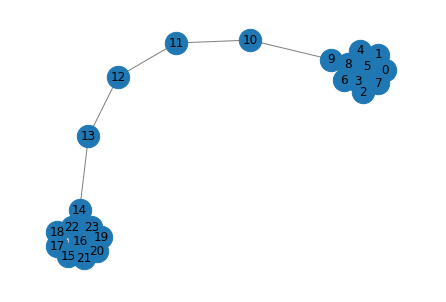

In [3]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

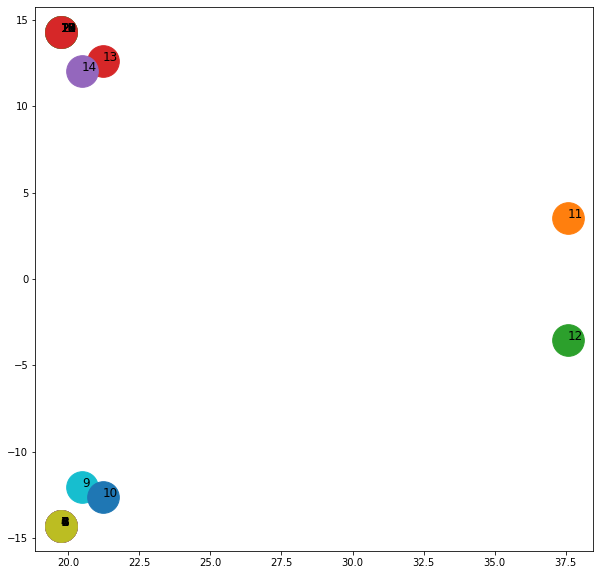

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

## HOPE

SVD error (low rank): 0.052092


(array([[ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07104037,  0.07104201,  0.07104037,  0.07104201],
        [ 0.00797181,  0.00799433,  0.00797181,  0.00799433],
        [ 0.00079628,  0.00099787,  0.00079628,  0.00099787],
        [-0.00079628,  0.00099787, -0.00079628,  0.00099787],
        [-0.00797181,  0.00799433, -0.00797181,  0.00799433],
        [-0.07104037,  0.07104201, -0.07104037,  0.07104201],
        [-0.07024409,  0.07024348, -0.07024409,  0.07024348],
        

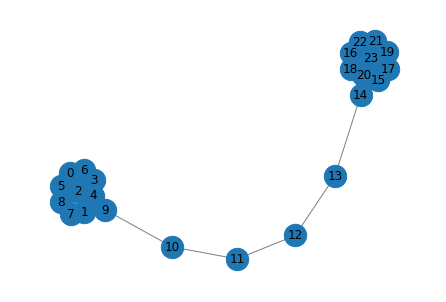

In [5]:
import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

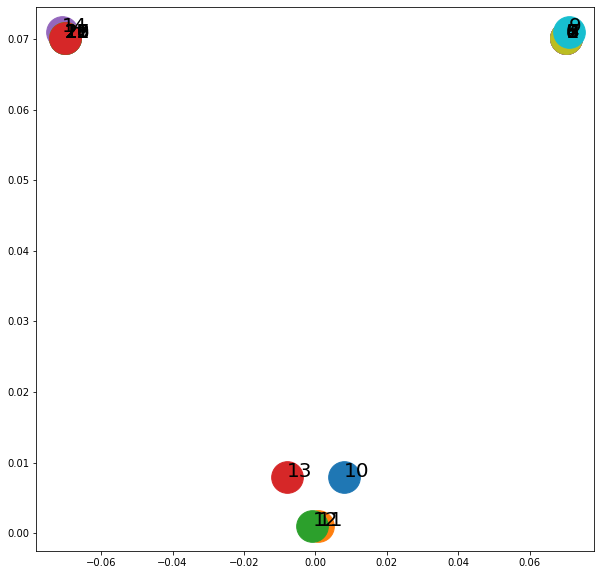

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

## DeepWalk

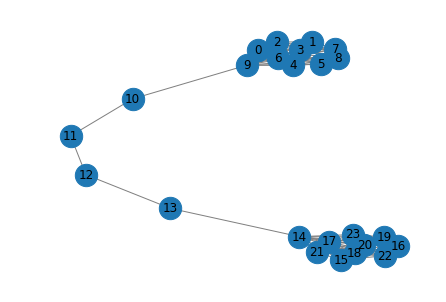

In [7]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2, epochs=20)
dw.fit(G)

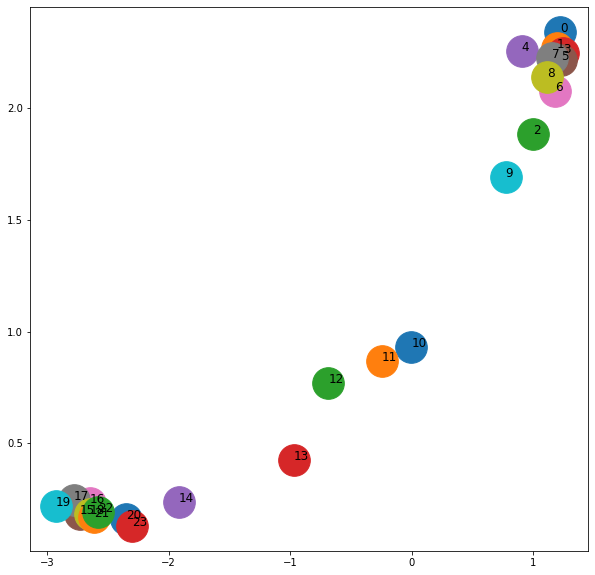

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Node2Vec

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


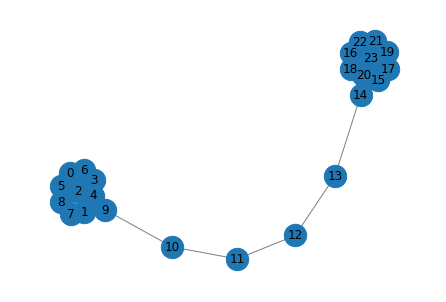

In [9]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

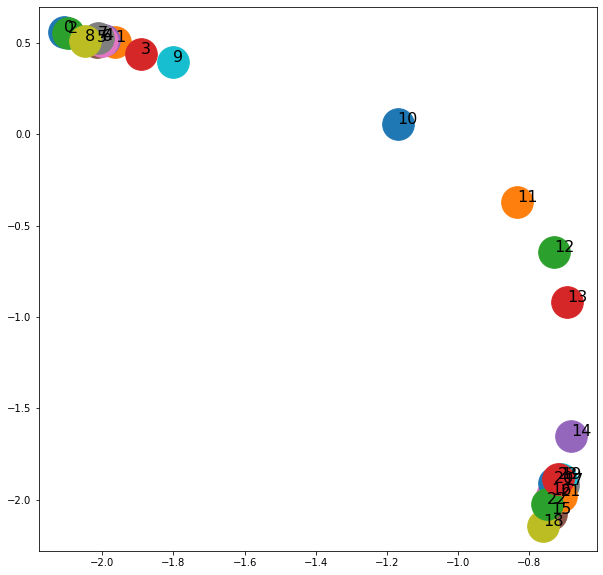

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Edge2Vec

In [11]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

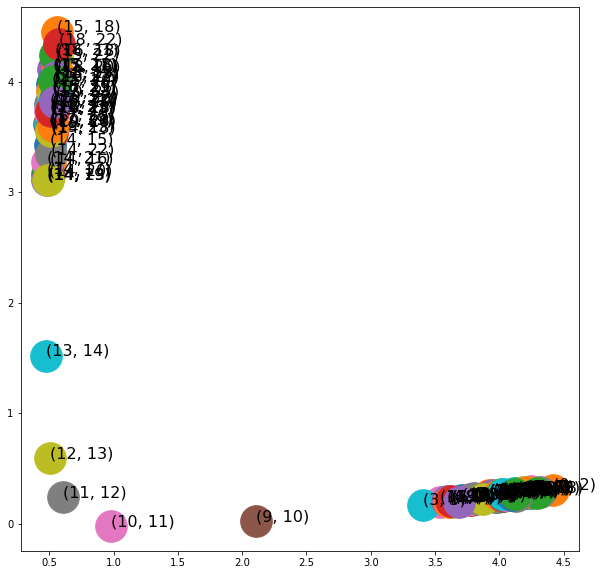

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Graph2Vec

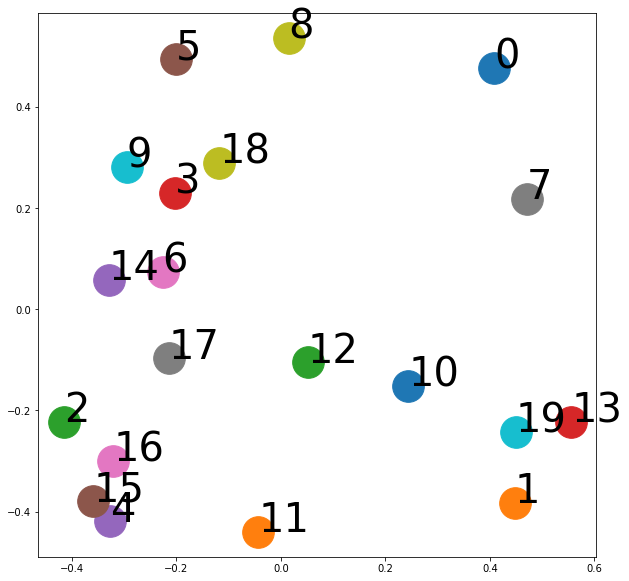

In [13]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)